Separate accidents that have happened on holidays from the dataset and save them into a new dataset with a marking to differentiate different holidays.

Initial imports and data

In [41]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date, timedelta

filename = "data_preparation/cleaned_data_file.csv"
df = pd.read_csv(filename, sep=",")

startYear = 2011
endYear = 2021

dates = ["01.01", "24.02", "01.05", "23.06", "24.06", "20.08", "24.12", "25.12", "31.12"] #Non moving holiday dates

Functions

In [42]:
def movingHolidays(start, end):
    movingholidaydates = {"Good Friday": [], "Easter": [], "Pentecost": []}

    for y in range(start, end + 1):
        #Following code is from https://www.assa.org.au/edm#Calculator
        first_dig = y // 100  # first 2 digits of year
        remain_19 = y % 19  # remainder of year / 19

        # calculate PFM date
        temp = (first_dig - 15) // 2 + 202 - 11 * remain_19

        if first_dig in [21, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 38]:
            temp -= 1
        elif first_dig in [33, 36, 37, 39, 40]:
            temp -= 2
        temp %= 30

        t_a = temp + 21
        if temp == 29:
            t_a -= 1
        if temp == 28 and remain_19 > 10:
            t_a -= 1

        # find the next Sunday
        t_b = (t_a - 19) % 7

        t_c = (40 - first_dig) % 4
        if t_c == 3:
            t_c += 1
        if t_c > 1:
            t_c += 1

        temp = y % 100
        t_d = (temp + temp // 4) % 7

        t_e = ((20 - t_b - t_c - t_d) % 7) + 1
        d = t_a + t_e

        if d > 31:
            d -= 31
            m = 4
        else:
            m = 3

        easter = date(y, m, d)
        goodfriday = easter - timedelta(2)
        pentecost = easter + timedelta(49)

        movingholidaydates["Good Friday"].append(goodfriday.strftime("%d.%m.%Y"))
        movingholidaydates["Pentecost"].append(pentecost.strftime("%d.%m.%Y"))
        movingholidaydates["Easter"].append(easter.strftime("%d.%m.%Y"))

    return movingholidaydates

def getHolidayName(d):

    holidays = {
        "01.01": "New Year's Day",
        "24.02": "Independence day",
        "01.05": "Spring Holiday",
        "23.06": "Victory Day",
        "24.06": "Midsummer day",
        "20.08": "Restoration of Independence Day",
        "24.12": "Christmas Eve",
        "25.12": "Christmas",
        "26.12": "Christmas 2",
        "31.12": "New Year's eve"
    }

    if d in holidays.keys():
        print(d)
        return holidays.get(d)
    else:
        return "-"

def addHolidays(movingholidaydates, holidays, source, holidaydates, start, end):
    #for holiday in movingholidaydates:
    #    for d in movingholidaydates[holiday]:
    #        entry = source.loc[source["Date"] == d]
    #        holidays = pd.concat([holidays, entry])

    for d in holidaydates:
        for year in range(start, end + 1):
            sd = str(d) + "." + str(year)
            entry = source.loc[source["Date"] == sd]
            holidays = pd.concat([holidays, entry])

    return holidays

Calculating all the moving holiday dates

In [43]:
movingholidays = movingHolidays(startYear, endYear)

Splitting the initial dataframe into 2: accidents that have happened on holidays and accidents that have happened on all the other dates

In [44]:
nonholiday_df= df.copy()
holidaydf = addHolidays(movingholidays, pd.DataFrame(), nonholiday_df, dates, startYear, endYear)
holidaystats_df = holidaydf.copy()

#for row in holidaydf.index:
#    nonholiday_df = nonholiday_df.drop(row)

Adding year and date columns to the datasets for easier plotting

In [45]:
holidaystats_df["Day"], holidaystats_df["Month"], holidaystats_df["Year"] = holidaydf["Date"].str.split(".").str

holidaystats_df = holidaystats_df.sort_values(by=["Year", "Month", "Day"])

holidaystats_df["DM"] = holidaystats_df["Day"] + "." + holidaystats_df["Month"]
holidaystats_df = holidaystats_df.drop("Day", axis=1)
holidaystats_df = holidaystats_df.drop("Month", axis=1)

nonholiday_df["Day"], nonholiday_df["Month"], nonholiday_df["Year"] = nonholiday_df["Date"].str.split(".").str

nonholiday_df = nonholiday_df.sort_values(by=["Year", "Month", "Day"])

nonholiday_df["DM"] = nonholiday_df["Day"] + "." + nonholiday_df["Month"]
nonholiday_df = nonholiday_df.drop("Day", axis=1)
nonholiday_df = nonholiday_df.drop("Month", axis=1)

holidaystats_df = holidaystats_df.sort_values("DM")
nonholiday_df

C:\Users\annut\AppData\Local\Temp\ipykernel_18940\2043402368.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  holidaystats_df["Day"], holidaystats_df["Month"], holidaystats_df["Year"] = holidaydf["Date"].str.split(".").str
C:\Users\annut\AppData\Local\Temp\ipykernel_18940\2043402368.py:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  nonholiday_df["Day"], nonholiday_df["Month"], nonholiday_df["Year"] = nonholiday_df["Date"].str.split(".").str


,Case,Involved,Dead,Wounded,Vehicles,Address,Type,Involved_lightmover,Involved_pedestrian,Involved_passenger,...,Surface_condition,Speed_limit,Weather,Lighting,Latitude,Longitude,Date,Time,Year,DM
172,2.302110e+12,2.0,0.0,1.0,2.0,Harju maakond Tallinn Põhja-Tallinna linnaosa...,Kokkupõrge sõidukiga küljelt,0.0,0.0,0.0,...,"Lumelörts, soolalumine segu",50.0,Pilvised olud,Pimeda ajal valgustus põleb,59.454940,24.690160,07.01.2011,23:34,2011,07.01
173,2.302110e+12,5.0,0.0,2.0,5.0,Harju maakond Tallinn Lasnamäe linnaosa J. Sm...,Kokkupõrge vastutuleva sõidukiga,0.0,0.0,1.0,...,"Lumelörts, soolalumine segu",50.0,Pilvised olud,Valge aeg,59.425594,24.838646,13.01.2011,10:04,2011,13.01
174,2.302110e+12,2.0,0.0,1.0,2.0,Harju maakond Tallinn Lasnamäe linnaosa Peter...,Kokkupõrge vastutuleva sõidukiga,0.0,0.0,0.0,...,"Lumelörts, soolalumine segu",50.0,Lumised olud,Valge aeg,59.424597,24.789470,13.01.2011,12:54,2011,13.01
1182,2.402110e+12,1.0,0.0,1.0,0.0,Lääne-Viru maakond VANA Rakvere linn Karja tn,Kokkupõrge jalakäijaga,0.0,1.0,0.0,...,"Lumelörts, soolalumine segu",50.0,Selged olud,Valge aeg,59.339126,26.368950,13.01.2011,15:00,2011,13.01
1596,2.502120e+12,2.0,0.0,5.0,2.0,Rapla maakond VANA Rapla vald Rapla linn,Kokkupõrge vastutuleva sõidukiga,0.0,0.0,1.0,...,Töödeldud pinnaga kinnisõidetud lumi,70.0,Selged olud,Valge aeg,58.995484,24.845675,15.01.2011,10:48,2011,15.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9748,3.100211e+12,2.0,0.0,1.0,2.0,Harju maakond Tallinn Mustamäe linnaosa Ehita...,Kokkupõrge sõidukiga küljelt,0.0,0.0,0.0,...,"Lumelörts, soolalumine segu",50.0,Lumised olud,Pimeda ajal valgustus põleb,59.407148,24.667432,30.12.2021,18:07,2021,30.12
9749,3.100211e+12,1.0,0.0,1.0,1.0,Harju maakond Kose vald,Sõiduki teelt väljasõit,0.0,0.0,0.0,...,"Lumelörts, soolalumine segu",60.0,Lumised olud,Pimeda ajal valgustus puudub,59.225528,24.964711,30.12.2021,21:33,2021,30.12
9750,3.100211e+12,1.0,0.0,1.0,1.0,Põlva maakond Põlva vald Aarna küla,Sõiduki teelt väljasõit,0.0,0.0,0.0,...,"Lumelörts, soolalumine segu",90.0,Selged olud,Pimeda ajal valgustus puudub,58.062632,26.961836,31.12.2021,17:24,2021,31.12
9751,3.100211e+12,1.0,0.0,1.0,1.0,Valga maakond Otepää vald,Kokkupõrge teevälise takistusega,0.0,0.0,0.0,...,Töötlemata pinnaga kinnisõidetud lumi,90.0,Selged olud,Pimeda ajal valgustus puudub,57.917078,26.308786,31.12.2021,22:16,2021,31.12


Creating a dataframe where the columns are holidays and rows are years with the values being accident counts

In [46]:
holidayNames = []
holiday_dict = {}

for d in dates:
    name = getHolidayName(d)
    holidayNames.append(name)

for year in range(startYear, endYear+1):
    holiday_dict[year] = []

    for d in dates:
        v = holidaystats_df[holidaystats_df["Year"] == str(year)]
        v = v[v["DM"] == d]
        holiday_dict[year].append(v.value_counts().sum())

accidentCount_df = pd.DataFrame.from_dict(holiday_dict, orient="index", columns=holidayNames)

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
31.12


Calculations

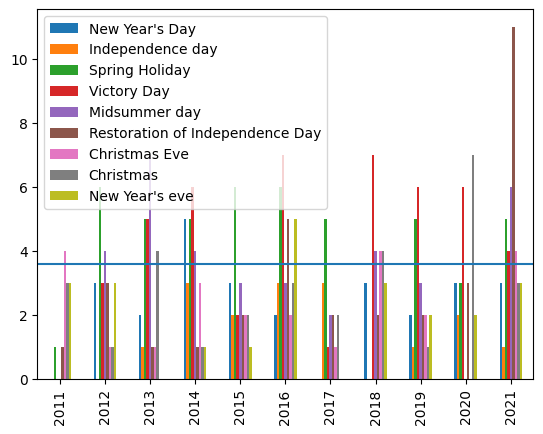

In [47]:
#holidayDatesCount = len(dates) + len(movingholidays)
holidayDatesCount = len(dates)

avgPerNonDay = nonholiday_df["Year"].value_counts().sum() / (endYear - startYear + 1) / (365 - holidayDatesCount)
avgPerDay = holidaystats_df["Year"].value_counts().sum() / (endYear - startYear + 1) / holidayDatesCount
p = accidentCount_df.plot(kind="bar")
p.axhline(avgPerNonDay)
plt.savefig("holidayAccidents")

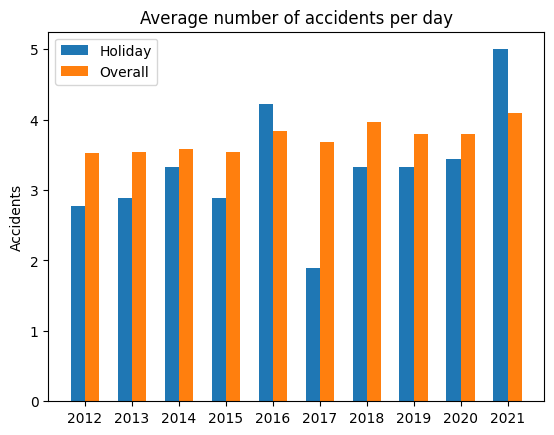

In [48]:
yearCount = nonholiday_df["Year"].value_counts()
yearCountH = holidaystats_df["Year"].value_counts()

nonsplit = []
split = []
years = []

for year in range(startYear+1, endYear+1):
    nonavg = yearCount.loc[[str(year)]] / 365 #(365 - holidayDatesCount)
    avg = yearCountH.loc[[str(year)]] / holidayDatesCount
    nonsplit.append(round(float(nonavg.item()), 2))
    split.append(round(float(avg.item()), 2))
    years.append(year)

x = np.arange(len(years))
width = 0.3

fig, ax = plt.subplots()
l1 = ax.bar(x- width/2, split, width, label="Holiday")
l2 = ax.bar(x+ width/2, nonsplit, width, label="Overall")

ax.set_ylabel("Accidents")
ax.set_title("Average number of accidents per day")
ax.set_xticks(x, years)
ax.legend()

plt.savefig("averageComparison")

plt.show()

Find top 3 days with the highest number of accidents

13445
[67, 64, 63]


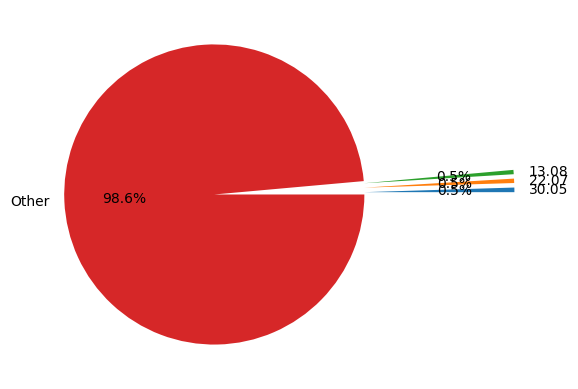

DM
05.06    62
07.06    61
11.08    60
06.08    60
10.07    60
         ..
27.02    17
15.02    16
12.02    16
03.04    16
29.02     9
Length: 363, dtype: int64

In [49]:
nonholiday_df = nonholiday_df[nonholiday_df["Year"] != "2011"]

high = nonholiday_df.value_counts("DM")[:3]
other = nonholiday_df.value_counts("DM")[3:]

labels = list(high.index.values)
nr = []
out = []

for label in labels:
    accidents = int(high.loc[[label]])
    nr.append(accidents)
    out.append(1)

labels.append("Other")
otherC = int(sum(other))
print(otherC)
print(nr)
nr.append(otherC)
out.append(0)

fig, ax = plt.subplots()
ax.pie(nr, labels=labels, autopct='%1.1f%%', explode=out)
ax.axis("equal")

plt.show()

other

Visualise the waves per year

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


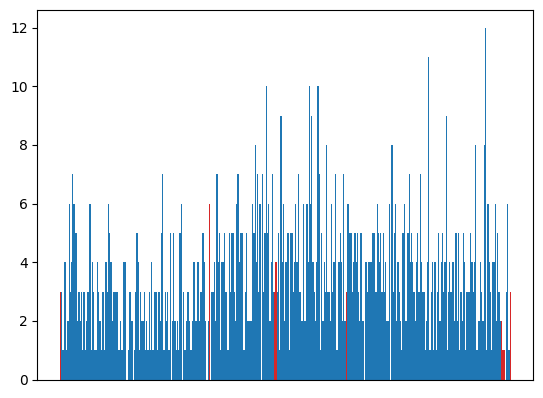

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

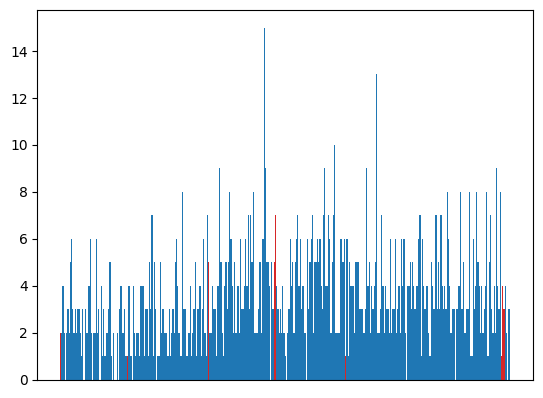

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

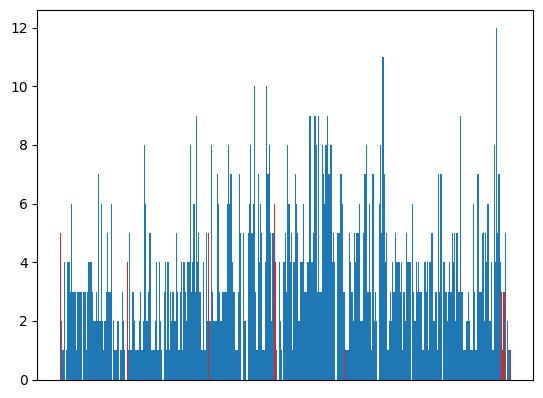

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

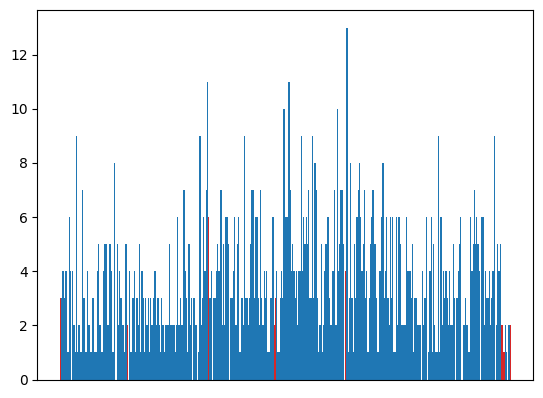

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

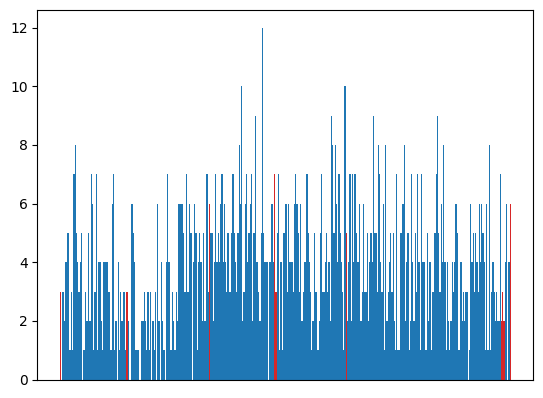

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

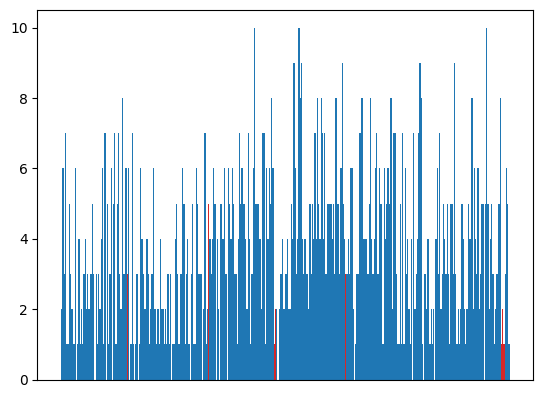

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

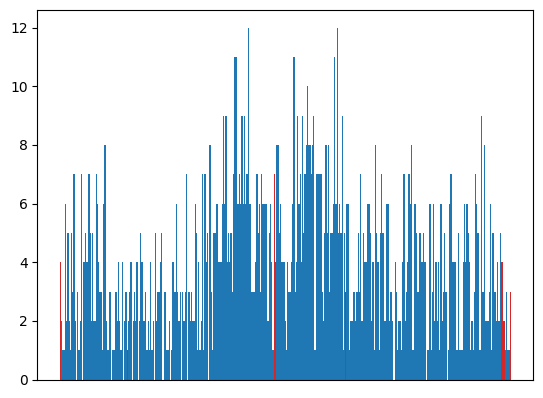

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

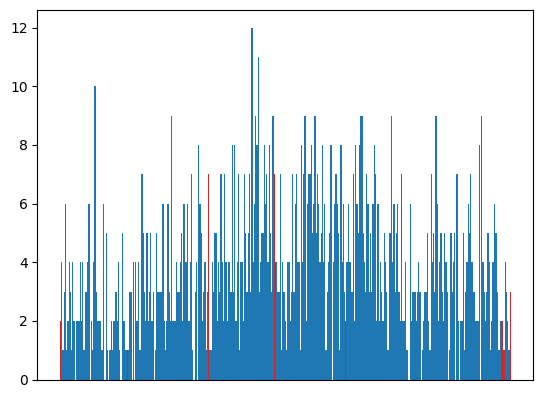

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

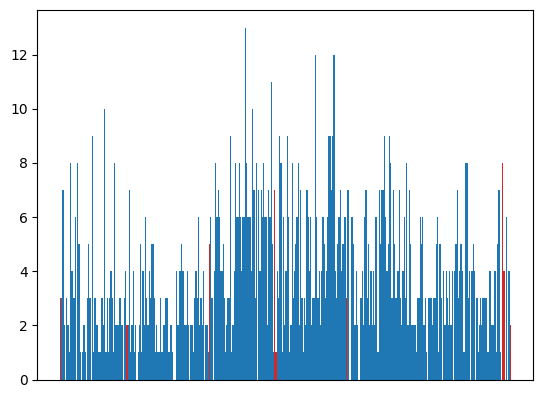

01.01
24.02
01.05
23.06
24.06
20.08
24.12
25.12
26.12
31.12


<Figure size 640x480 with 0 Axes>

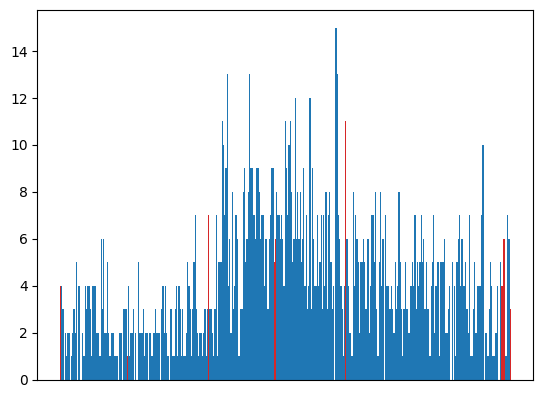

<Figure size 640x480 with 0 Axes>

In [51]:
nonholiday_df = nonholiday_df[nonholiday_df["Year"] != "2011"]
counts = high = nonholiday_df.value_counts("DM")
labels = list(counts.index.values)

#plt.figure(figsize=(50, 20))

#fig1, axs1 = plt.subplots(10, 1)
#fig1, axs1 = plt.subplots()
#rnr = 0
for year in range(startYear+1, endYear+1):
    fig1, axs1 = plt.subplots()
    yearDF = nonholiday_df[nonholiday_df["Year"] == str(year)]
    dates = []
    count = []
    colors = []

    for month in range(1, 13):
        for day in range(1, 32):
            try:
                d = datetime.date(year, month, day)
                strD = d.strftime("%d.%m")
                dates.append(strD)
                occurrence = yearDF["DM"].str.contains(strD).sum()
                count.append(occurrence)
                if getHolidayName(strD) != "-":
                    colors.append("tab:red")
                else:
                    colors.append("tab:blue")

            except ValueError:
                pass

    #axs1[rnr].plot(dates, count)
    #axs1[rnr].get_xaxis().set_visible(False)
    #rnr += 1
    #plt.plot(dates, count)
    axs1.bar(dates, count, width=1.0, color=colors)
    axs1.get_xaxis().set_visible(False)

    plt.show()
    plt.savefig("LinearYear" + str(year))
